# ML - 03 Clustering

In [ ]:
# install required packages
%pip install -r requirements.txt

# 3.1 Mobile phone picture
The goal of the homework is to reduce the number of RGB colors by using k-means.


## Load image, resize, and create a 2D array of RGB values.

Plot the image and the 2D array of RGB values.

In [ ]:
import cv2
from matplotlib import pyplot as plt

def load_image(image_path):
    original = cv2.imread(image_path)
    resized = cv2.resize(original, (500,500),interpolation=cv2.INTER_AREA)
    flattened = resized.reshape((resized.shape[0] * resized.shape[1], 3))
    plt.imshow(resized)
    return [resized, flattened]

img1, pixels1 = load_image('image.jpg')
img2, pixels2 = load_image('image2.jpg')
img3, pixels3 = load_image('image3.jpg')

## Find the best k number of n_clusters

Use the elbow method to find the best k number of n_clusters.
- We have to store the inertia values for each k number of n_clusters. It is the sum of squared distances of samples to their closest cluster center.

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

def elbow_plot(flattened):
    inertia_list = []
    clusters = [1,2,3,4,5,6]

    for n_clusters in clusters:
        kmeans = KMeans(n_clusters=n_clusters, random_state=10, n_init=10, max_iter=100).fit(flattened)
        inertia_list.append(kmeans.inertia_)

    plt.plot(clusters, inertia_list, marker='o')
    plt.title('WSS Elbow Plot')
    plt.xlabel('K n_clusters')
    plt.ylabel('Inertia')
    plt.show()

elbow_plot(pixels1)


We can see the elbow is at k=2

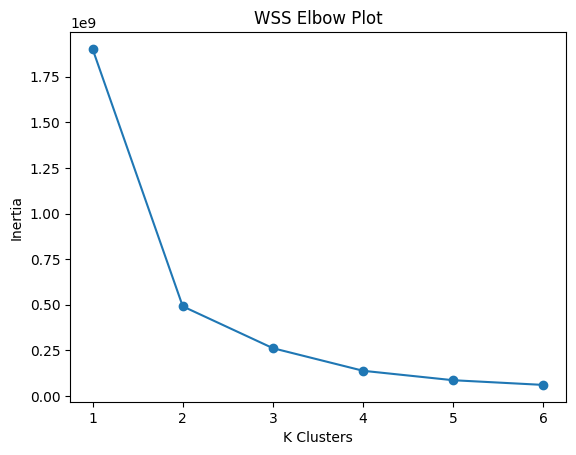

## Plot the image with
- original image
- the best k number of n_clusters
- random k number of n_clusters

In [ ]:
def kmeans_clustering(n_clusters,resized,flattened):
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++", n_init=10, max_iter=500, random_state=50).fit(flattened)
    centers = kmeans.cluster_centers_
    prediction = kmeans.predict(flattened)
    # Go back to original image dimensions
    prediction = prediction.reshape(resized.shape[0], resized.shape[1])
    images = np.zeros((prediction.shape[0], prediction.shape[1], 3), dtype=np.uint8)
    # Replace each pixel with its matching centroid
    for i in range(images.shape[0]):
        for j in range(images.shape[1]):
            images[i, j, :] = centers[prediction[i, j], :]
    
    plt.title("K = " + str(n_clusters))
    plt.imshow(images)
    plt.show()

plt.figure()
plt.title("Original image")
plt.imshow(img1)
plt.show()

#run the kmeans function for different number of n_clusters

for n_clusters in [2, 3, 4, 5, 6]:
    kmeans_clustering(n_clusters, img1, pixels1)

## Results
<div style="display:flex;">
    <div style="flex:1;padding-right:5px;">
        <img src="../result/img1_original.png" width="300">
    </div>
    <div style="flex:1;padding-right:5px;">
        <img src="../result/img1_k2.png" width="300">
    </div>
    <div style="flex:1;padding-right:5px;">
        <img src="../result/img1_k3.png" width="300">
    </div>
    <div style="flex:1;padding-right:5px;">
        <img src="../result/img1_k4.png" width="300">
    </div>
    <div style="flex:1;padding-right:5px;">
        <img src="../result/img1_k5.png" width="300">
    </div>
    <div style="flex:1;padding-right:5px;">
        <img src="../result/img1_k6.png" width="300">
    </div>
</div>

## Optional ( Try to use other images )

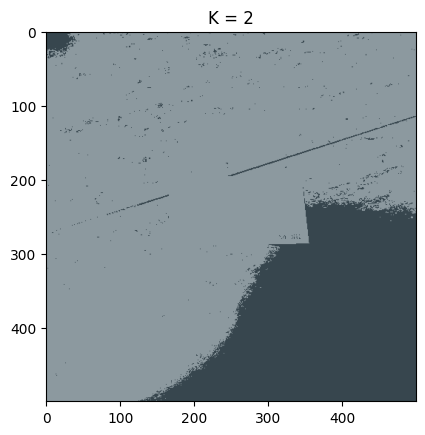

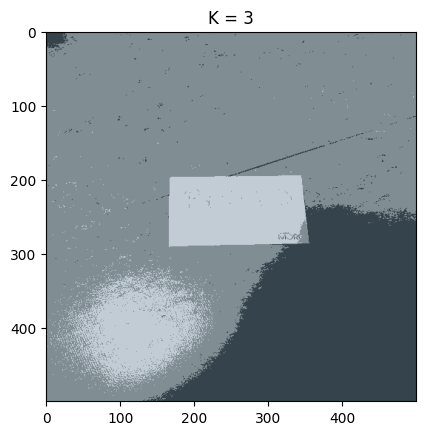

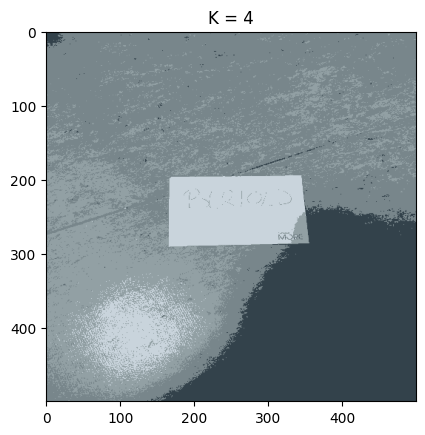

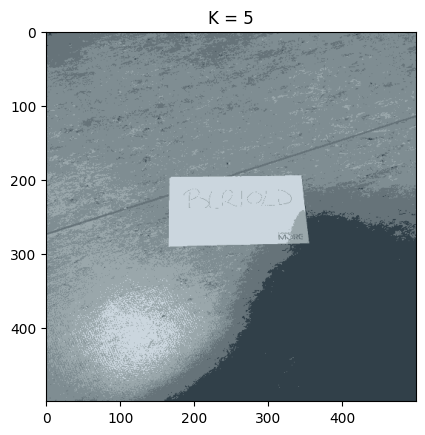

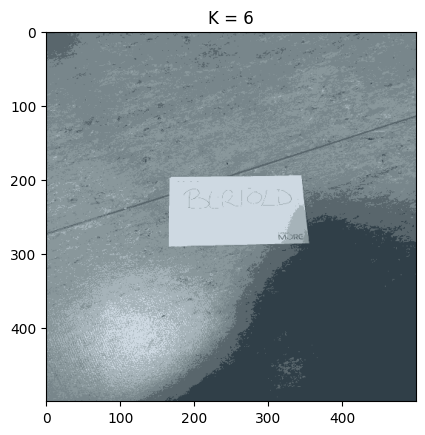

In [25]:
for n_clusters in [2, 3, 4, 5, 6]:
    kmeans_clustering(n_clusters, img2, pixels2)


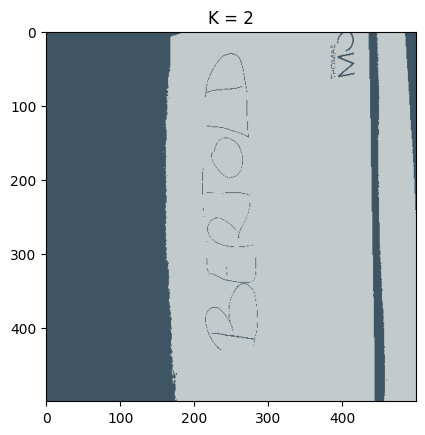

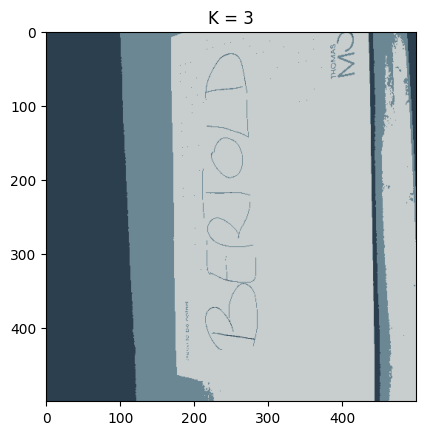

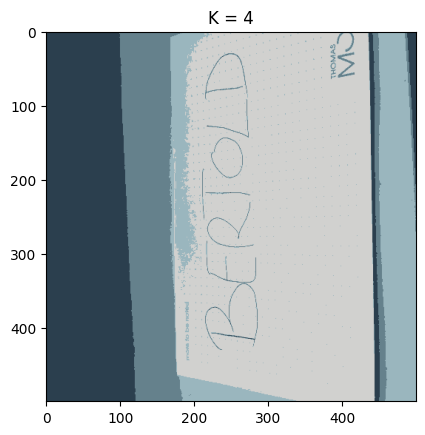

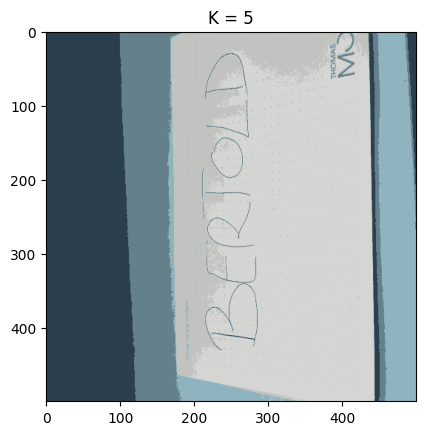

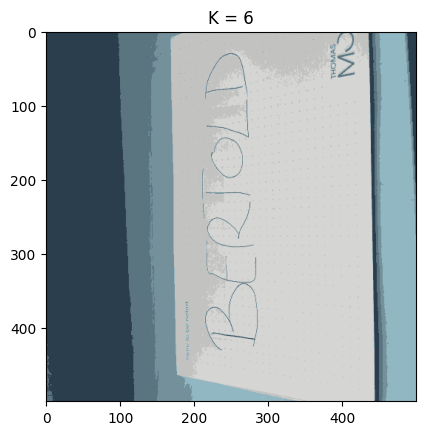

In [26]:
for n_clusters in [2, 3, 4, 5, 6]:
    kmeans_clustering(n_clusters, img3, pixels3)

# 3.2 Drilling machine

## Load the data

In [62]:
import pandas as pd

df = pd.read_csv('drilling.csv')

print(df.head(10))

          x         y
0  0.311910  0.223846
1  0.611944  0.859759
2  0.566906  0.147251
3  0.178646  0.387353
4  0.241519  0.247069
5  0.683198  0.879005
6  0.732084  0.208386
7  0.156949  0.495125
8  0.218294  0.171284
9  0.780914  0.780394


## K-means clustering

First we will get the best k number of n_clusters by using the elbow method.

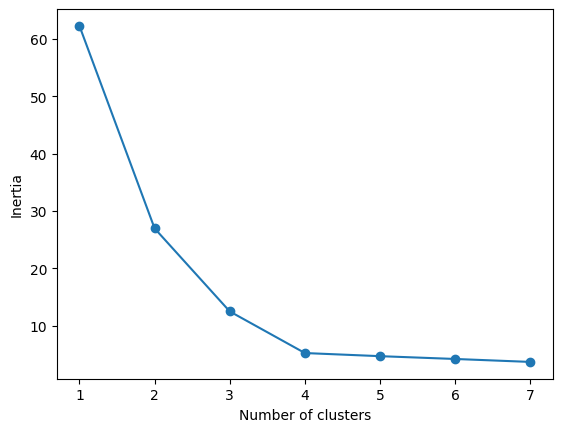

In [63]:
# run KMeans with different values of K and record the inertia (distortion)
inertias = []
for n_clusters in range(1, 8):
    kmeans = KMeans(n_clusters=n_clusters, max_iter=300, random_state=0, n_init=10).fit(df)
    inertias.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1, 8), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

We can see elbow is at k=3

Now we will plot the data with the best k number of n_clusters.

In [ ]:
# run KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=3, max_iter=300, random_state=0, n_init=10).fit(df)

# get the cluster memberships for each observation
y_km = kmeans.predict(df)

# add the cluster memberships to the DataFrame
df['cluster'] = y_km

print(df.head())

# scatterplot of
plt.scatter(df['x'], df['y'], c=df['cluster'], cmap='viridis')
plt.title('K-Means Clustering Results with K=4')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

<div style="display:flex;">
    <div style="flex:1;padding-right:5px;">
        <img src="../result/k_means_scatter_plot.png" width="500">
    </div>
</div>

## Hierarchical clustering

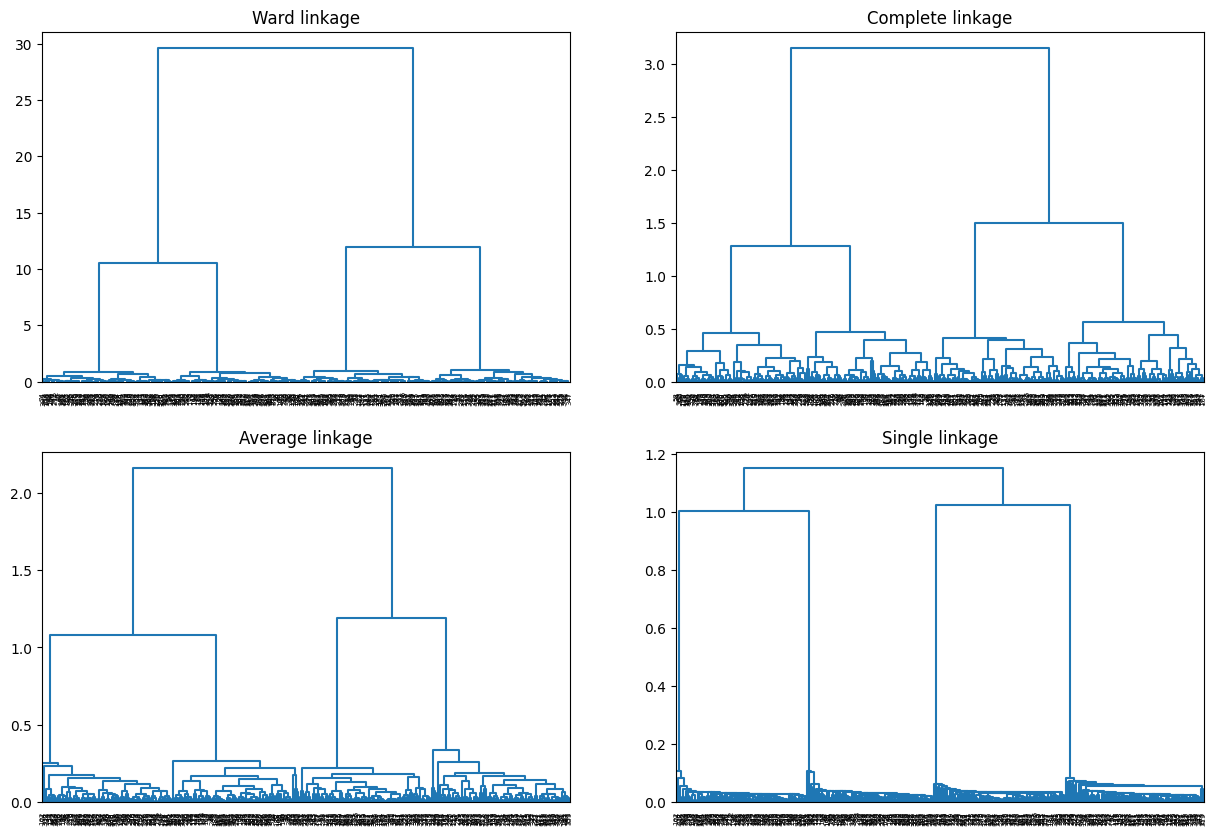

          x         y  cluster
0  0.311910  0.223846        2
1  0.611944  0.859759        3
2  0.566906  0.147251        1
3  0.178646  0.387353        4
4  0.241519  0.247069        2


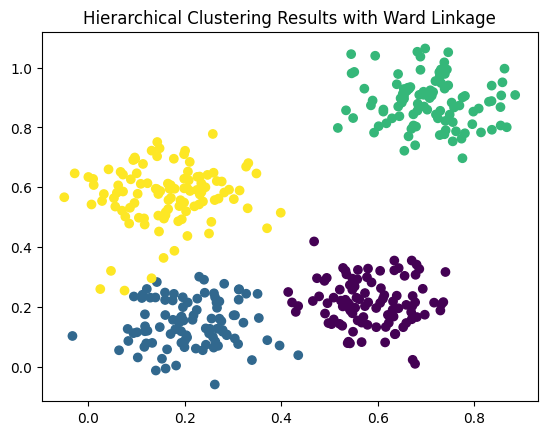

In [52]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
methods = ['ward', 'complete', 'average', 'single']
linkages = {}
for method in methods:
    linkages[method] = linkage(df, method=method)

# plot the dendrogram for each linkage method
plt.figure(figsize=(15, 10))
for i, method in enumerate(methods):
    plt.subplot(2, 2, i+1)
    plt.title(method.capitalize() + ' linkage')
    dendrogram(linkages[method], color_threshold=0)
plt.show()

# choose the linkage method based on the dendrogram and determine the optimal number of clusters (K)
chosen_method = 'ward'
max_d = 1.5 
clusters = fcluster(linkages[chosen_method], max_d, criterion='distance')

# add the cluster memberships as a new column to the DataFrame
df['cluster'] = clusters

# display the first five rows of the DataFrame with the cluster memberships
print(df.head())

# scatterplot of the data colored by cluster membership
plt.title('Hierarchical Clustering Results with Ward Linkage')
plt.scatter(df['x'], df['y'], c=df['cluster'], cmap='viridis')



## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

# perform DBSCAN clustering
min_pts = 5
eps_list = np.linspace(0.05, 0.5, num=100)
num_clusters_list = []

for eps in eps_list:
    dbscan = DBSCAN(eps=eps, min_samples=min_pts).fit(df)
    num_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
    num_clusters_list.append(num_clusters)

# find the knee point of the elbow curve
knee_idx = np.argmin(np.gradient(num_clusters_list))
optimal_eps = eps_list[knee_idx]

# perform DBSCAN clustering again with the optimal eps value
dbscan = DBSCAN(eps=optimal_eps, min_samples=min_pts).fit(df)
clusters = dbscan.labels_

# add the cluster memberships as a new column to the DataFrame
df['cluster'] = clusters

print(df.head())

# scatterplot of the data colored by cluster membership
plt.title('DBSCAN Clustering Results with Eps={}'.format(round(optimal_eps, 2)))
plt.scatter(df['x'], df['y'], c=df['cluster'], cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


## Comparison of the methods

First we have the original scatter plot. Then we have the scatter plot with the best k number of n_clusters. Finally we have the scatter plot with the hierarchical clustering.

We can see that every clustering method had the same good results except for the DBSCAN method.

<div style="display:flex;">
    <div style="flex:1;padding-right:5px;">
        <img src="../result/original_scatter_plot.png" width="500">
    </div>
    <div style="flex:1;padding-right:5px;">
        <img src="../result/k_means_scatter_plot.png" width="500">
    </div>
    <div style="flex:1;padding-right:5px;">
        <img src="../result/hierarchical_scatter_plot.png" width="500">
    </div>
    <div style="flex:1;padding-right:5px;">
        <img src="../result/dbscan_scatter_plot.png" width="500">
    </div>
</div>